In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
data=pd.read_csv("ex2data2.txt",header=None)

In [141]:
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [142]:
x=data.iloc[:,:-1]
y=data.iloc[:,2]

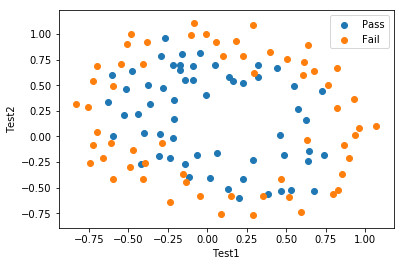

In [143]:
mask = y==1
test_pass=plt.scatter(x[mask][0].values,x[mask][1].values)
test_fail=plt.scatter(x[~mask][0].values,x[~mask][1].values)
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.legend((test_pass,test_fail),("Pass","Fail"))
plt.show()

In [144]:
def mapfeature(X,deg):
    X1=X.iloc[:,0]
    X2=X.iloc[:,1]
    out=np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1,deg+1):
        for j in range(i+1):
            out=np.hstack((out,np.multiply(np.power(X1,i-j),np.power(X2,j))[:,np.newaxis]))
    return out

In [145]:
X=mapfeature(x,6)

In [147]:
y=y[:,np.newaxis]

In [148]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [122]:
def cost_func(x,y,theta,lam):
    m=len(y)
    err=np.multiply(y,np.log(sigmoid(x.dot(theta))))+np.multiply((1-y),np.log(1-sigmoid((x.dot(theta)))))
    pre=(-1/m)*np.sum(err)
    regu=(lam/2*m)*sum(theta[1:]**2)
    cost=pre+regu
    return cost

In [150]:
theta=np.zeros((28,1))

In [125]:
cost_func(X,y,theta,1)

array([0.69314718])

In [153]:
def rgradient_descent(X,y,theta,lam,itera,alpha):
    m=len(y)
    store=[]
    for i in range(itera):
        hypo=sigmoid(X @ theta)
        pred=hypo-y
        err0=(1/m)*((X.T @ pred)[0])
        err1=(1/m)*((X.T @ pred)[1:])+(lam/m)* theta[1:]
        grad= np.vstack((err0[:,np.newaxis],err1))
        theta-=(alpha*grad)
        data=cost_func(X,y,theta,lam)
        store.append(data)
    return theta,store

In [154]:
theta,store=rgradient_descent(X,y,theta,0.2,800,1)

In [155]:
theta

array([[ 2.25319932],
       [ 1.44552306],
       [ 2.33283911],
       [-3.57008233],
       [-2.35002884],
       [-3.07090829],
       [ 0.50119267],
       [-0.88407626],
       [-0.69606495],
       [-0.22204243],
       [-2.69560917],
       [ 0.04161168],
       [-1.31573798],
       [-0.80286232],
       [-2.23101395],
       [-0.39638083],
       [-0.43758167],
       [ 0.09476652],
       [-0.69300577],
       [-0.78996079],
       [-0.45416815],
       [-2.01051679],
       [ 0.16446857],
       [-0.59855483],
       [ 0.11471778],
       [-0.73960173],
       [-0.52044034],
       [-1.38532427]])

In [158]:
def mapFeaturePlot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

Text(0, 0.5, 'Exam 2 score')

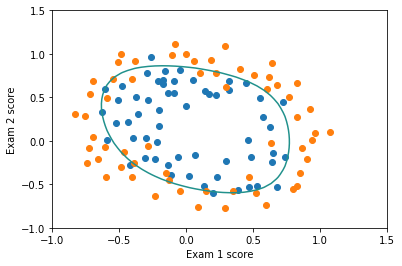

In [160]:
mask = y==1
test_pass=plt.scatter(x[mask][0].values,x[mask][1].values)
test_fail=plt.scatter(x[~mask][0].values,x[~mask][1].values)
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")